In [1]:
import add_label as al
import to_binary as tb
import pandas as pd
import numpy as np

In [2]:
CBE_geneCounts = pd.read_csv('MayoRNAseq_RNAseq_CBE_geneCounts_normalized.tsv', sep='\t')
CBE_covariates = pd.read_csv('MayoRNAseq_RNAseq_CBE_covariates.csv')

In [3]:
CBE = al.add_label(CBE_geneCounts, CBE_covariates)

In [18]:
TCX_geneCounts = pd.read_csv('MayoRNAseq_RNAseq_TCX_geneCounts_normalized.tsv', sep='\t')
TCX_covariates = pd.read_csv('MayoRNAseq_RNAseq_TCX_covariates.csv')

In [19]:
TCX = al.add_label(TCX_geneCounts, TCX_covariates)

In [4]:
CBE_x, CBE_y = tb.to_binary(CBE)

In [14]:
CBEb = pd.concat([CBE_y, CBE_x], axis=1)

In [82]:
CBEb.shape

(159, 64254)

In [20]:
TCX_x, TCX_y = tb.to_binary(TCX)

In [21]:
TCXb = pd.concat([TCX_y, TCX_x], axis=1)

In [83]:
TCXb.shape

(160, 64254)

In [113]:
import linear_svc as ls

In [114]:
best_acc_CBE = ls.linear_svc(CBE_x, CBE_y)

selected num of features:  5
C_best =  [1.32162073] highest accuracy =  [0.81208333]
selected num of features:  10
C_best =  [12.30159931] highest accuracy =  [0.8375]
selected num of features:  15
C_best =  [86.63820982] highest accuracy =  [0.825]
selected num of features:  20
C_best =  [86.63820982] highest accuracy =  [0.83125]
selected num of features:  50
C_best =  [21.48697412] highest accuracy =  [0.88125]
selected num of features:  75
C_best =  [86.63820982] highest accuracy =  [0.89375]
selected num of features:  100
C_best =  [65.55451795] highest accuracy =  [0.8875]
selected num of features:  250
C_best =  [  4.03212706   7.04284115 114.50285407] highest accuracy =  [0.8875 0.8875 0.8875]
selected num of features:  500
C_best =  [7.04284115] highest accuracy =  [0.90625]
selected num of features:  1000
C_best =  [37.53089701] highest accuracy =  [0.90625]
selected num of features:  5000
C_best =  [114.50285407] highest accuracy =  [0.89333333]
selected num of features:  10

In [123]:
best_acc_TCX = ls.linear_svc(TCX_x, TCX_y)

selected num of features:  5
C_best =  [2.30845028] highest accuracy =  [0.84375]
selected num of features:  10
C_best =  [21.48697412] highest accuracy =  [0.86875]
selected num of features:  15
C_best =  [86.63820982] highest accuracy =  [0.8875]
selected num of features:  20
C_best =  [37.53089701] highest accuracy =  [0.9]
selected num of features:  50
C_best =  [49.60161148] highest accuracy =  [0.91875]
selected num of features:  75
C_best =  [ 3.05089575 28.3976304 ] highest accuracy =  [0.93125 0.93125]
selected num of features:  100
C_best =  [  3.05089575  49.60161148 200.        ] highest accuracy =  [0.91875 0.91875 0.91875]
selected num of features:  250
C_best =  [16.25804865] highest accuracy =  [0.9]
selected num of features:  500
C_best =  [114.50285407] highest accuracy =  [0.90625]
selected num of features:  1000
C_best =  [16.25804865] highest accuracy =  [0.88125]
selected num of features:  5000
C_best =  [16.25804865] highest accuracy =  [0.89375]
selected num of 

In [124]:
import acc_fea_plot as afp

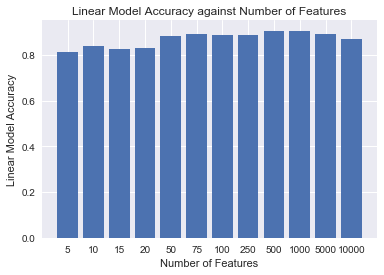

In [125]:
afp.acc_fea_plot(best_acc_CBE)

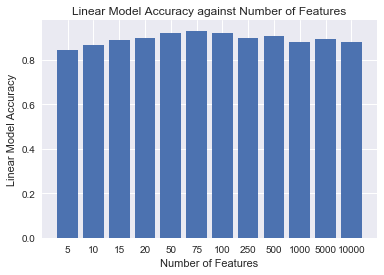

In [126]:
afp.acc_fea_plot(best_acc_TCX)

In [85]:
import mlp as mlp

/Users/Abelard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


number of gene 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 40)                440       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 40)                0         
_________________________________________________________________
activity_regularization_11 ( (None, 40)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 40)                1640      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 40)                0         
_________________________________________________________________
activity_regularization_12 ( (None, 40)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 82 

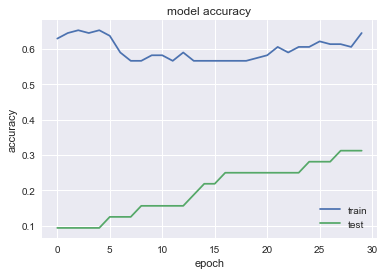

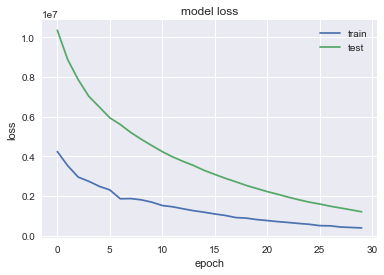

In [91]:
mlp.mlp(100, CBE_x, CBE_y, 10, 30)

In [93]:
import tsne_plot as tp


There are 2 unique target valuess in this dataset: [0 1]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 159 samples in 0.007s...
[t-SNE] Computed neighbors for 159 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 5104.356962
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.602119
[t-SNE] Error after 1000 iterations: 1.889142


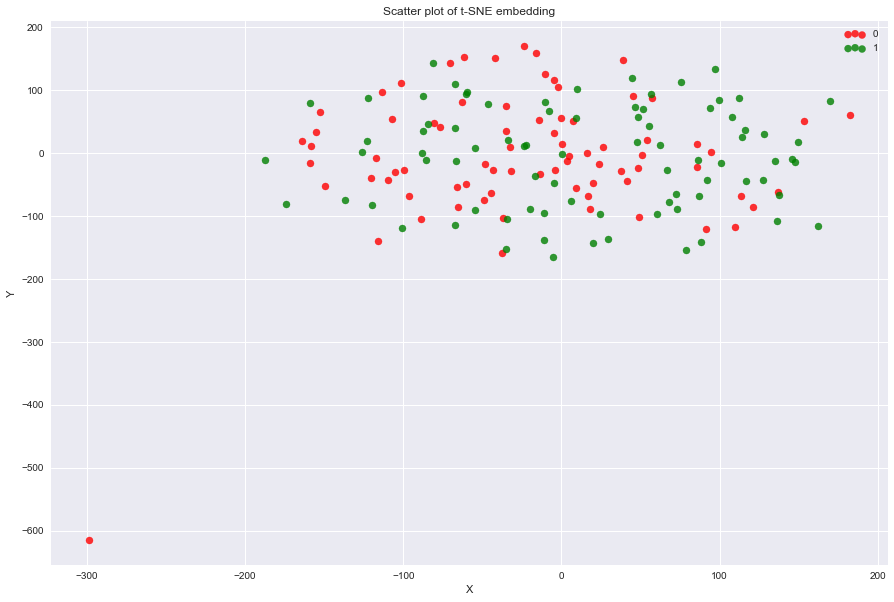

In [122]:
tp.tsne_plot(CBE_x, CBE_y, 3)


There are 2 unique target valuess in this dataset: [0 1]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 160 samples in 0.007s...
[t-SNE] Computed neighbors for 160 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 160 / 160
[t-SNE] Mean sigma: 7370.384522
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.645432
[t-SNE] Error after 900 iterations: 0.217526


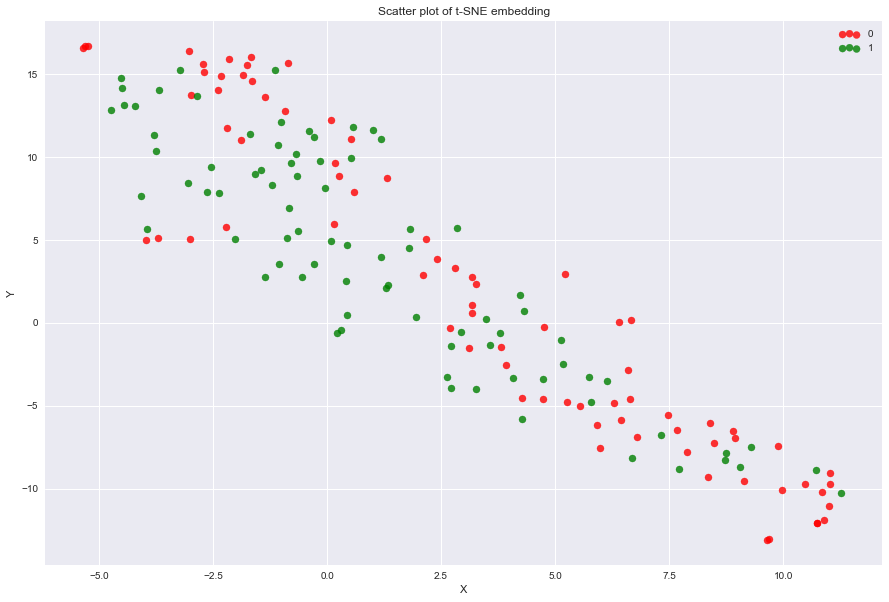

In [121]:
tp.tsne_plot(TCX_x, TCX_y, 2)

In [105]:
import pca_plot as pp


There are 2 unique target valuess in this dataset: [0 1]

Running PCA ...
Explained variance: 0.9960
Individual variance contributions:
0.9581089514054986
0.016315993732349526
0.006757390841156012
0.006028216587063822
0.0033910733865648926
0.0019359326684761904
0.0012869825965503689
0.0008639461489481775
0.0007722734021945475
0.000571431829052119


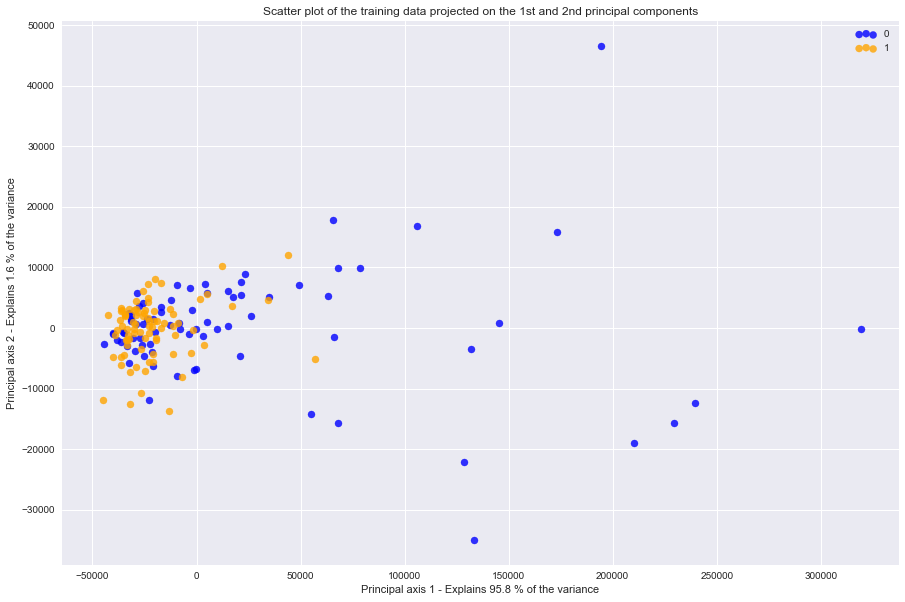

In [116]:
pp.pca_plot(CBE_x, CBE_y, 10)


There are 2 unique target valuess in this dataset: [0 1]

Running PCA ...
Explained variance: 0.9985
Individual variance contributions:
0.966310188463346
0.013049051050511027
0.010872226454017395
0.002777811517443445
0.0021192029217150924
0.0012972371322718334
0.000629598379273233
0.000565291389426185
0.00044416793499782865
0.00039939762818441726


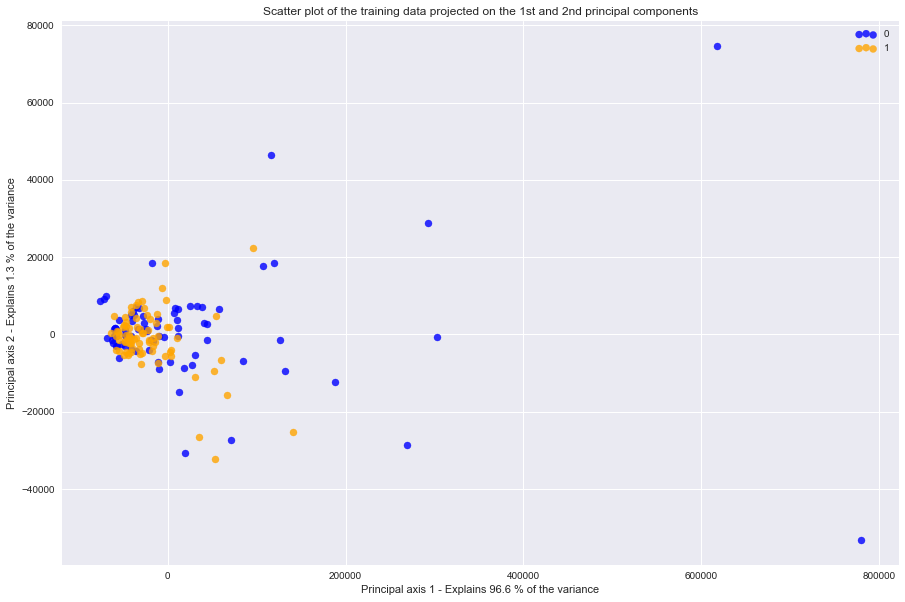

In [117]:
pp.pca_plot(TCX_x, TCX_y, 10)

In [8]:
import AgeSex_plot as asp

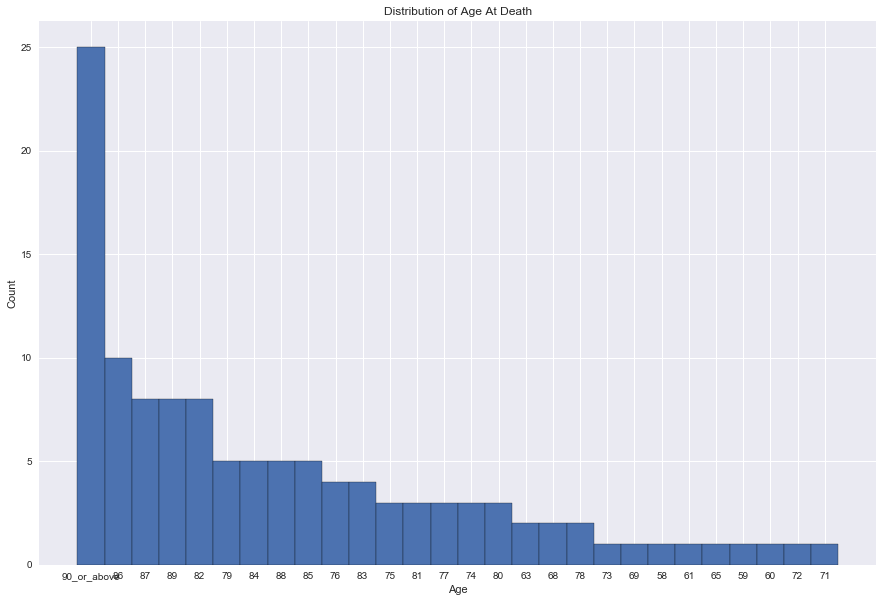

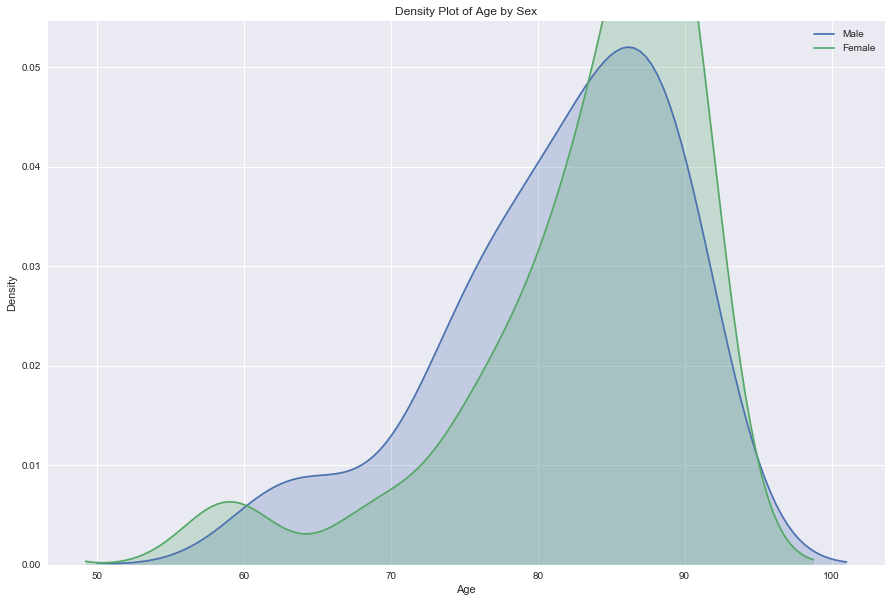

In [9]:
asp.AgeSex_plot(CBE_covariates)

In [33]:
import amcon_select as aas

In [34]:
finC, finT = aas.amcon_select(CBEb, TCXb)

In [37]:
finC.shape

(132, 64254)

In [38]:
finT.shape

(132, 64254)

In [66]:
finC_y = finC['Diagnosis']
finC_y = pd.DataFrame(finC_y)
finC_y = finC_y.astype(int)
finC_x = finC.drop(['Diagnosis'], axis=1)

In [67]:
finT_y = finT['Diagnosis']
finT_y = pd.DataFrame(finT_y)
finT_y = finT_y.astype(int)
finT_x = finT.drop(['Diagnosis'], axis=1)

In [132]:
import linear_svc_cfin as lsc

In [137]:
com_acc = lsc.linear_svc_cfin(finC_x, finC_y, finT_x, finT_y)

C_best =  [1.32162073] highest accuracy =  [0.90824176]
C_best =  [1.         7.04284115 9.30796486] highest accuracy =  [0.91593407 0.91593407 0.91593407]
C_best =  [  3.05089575   5.32894271   7.04284115 200.        ] highest accuracy =  [0.90824176 0.90824176 0.90824176 0.90824176]
C_best =  [16.25804865] highest accuracy =  [0.9467033]
C_best =  [16.25804865] highest accuracy =  [0.93956044]
C_best =  [16.25804865] highest accuracy =  [0.94615385]
C_best =  [2.30845028] highest accuracy =  [0.90879121]
C_best =  [ 16.25804865 151.32934551] highest accuracy =  [0.9543956 0.9543956]
C_best =  [ 9.30796486 16.25804865] highest accuracy =  [0.9543956 0.9543956]
C_best =  [7.04284115] highest accuracy =  [0.86373626]
C_best =  [ 49.60161148 114.50285407] highest accuracy =  [0.88681319 0.88681319]
C_best =  [1.] highest accuracy =  [0.84065934]


In [134]:
import best_acc_plot as bap

In [138]:
com_acc

[0.9082417582417583,
 0.915934065934066,
 0.9082417582417583,
 0.9467032967032967,
 0.9395604395604396,
 0.9461538461538461,
 0.9087912087912088,
 0.9543956043956043,
 0.9543956043956043,
 0.8637362637362637,
 0.8868131868131869,
 0.8406593406593407]

In [139]:
sum(com_acc)/len(com_acc)

0.9144688644688647

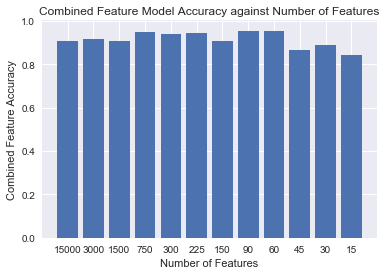

In [140]:
bap.best_acc_plot(com_acc)

In [127]:
import linear_svc_ori as lso

In [128]:
ori_acc = lso.linear_svc_ori(finC_x, finC_y, finT_x, finT_y)

C_best =  [1.] highest accuracy =  [0.90824176]
C_best =  [1.         1.32162073 1.74668135 4.03212706] highest accuracy =  [0.89285714 0.89285714 0.89285714 0.89285714]
C_best =  [ 1.74668135  9.30796486 37.53089701] highest accuracy =  [0.88516484 0.88516484 0.88516484]
C_best =  [ 1.74668135 37.53089701 49.60161148] highest accuracy =  [0.86318681 0.86318681 0.86318681]
C_best =  [9.30796486] highest accuracy =  [0.87747253]
C_best =  [3.05089575] highest accuracy =  [0.86318681]
C_best =  [  1.32162073   3.05089575 114.50285407] highest accuracy =  [0.89395604 0.89395604 0.89395604]
C_best =  [114.50285407] highest accuracy =  [0.9010989]
C_best =  [9.30796486] highest accuracy =  [0.90824176]
C_best =  [ 9.30796486 12.30159931] highest accuracy =  [0.8478022 0.8478022]
C_best =  [151.32934551] highest accuracy =  [0.85604396]
C_best =  [3.05089575] highest accuracy =  [0.78241758]


In [129]:
ori_acc

[0.9082417582417583,
 0.8928571428571429,
 0.885164835164835,
 0.8631868131868131,
 0.8774725274725274,
 0.8631868131868131,
 0.893956043956044,
 0.9010989010989011,
 0.9082417582417582,
 0.8478021978021978,
 0.8560439560439562,
 0.7824175824175824]

In [130]:
sum(ori_acc)/len(ori_acc)

0.873305860805861

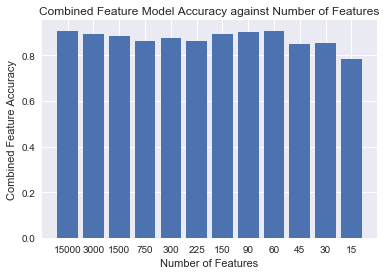

In [131]:
bap.best_acc_plot(ori_acc)